In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotnine as pn
from pathlib import Path  #%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotnine as pn
from pathlib import Path
from grapher import load_df, graph_boxplot


## Re-analysis of the HsTBP Constructs

In [ ]:
working_dir = Path(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TBP")

In [ ]:
cf_data = pd.concat([pd.read_csv(file) for file in working_dir.glob("*fractions.csv")])
region_data = pd.concat([pd.read_csv(file) for file in working_dir.glob("*regions.csv")])
from math import log10, floor


# Stolen from https://stackoverflow.com/a/3411435

def round_to_1(x):
    if x >= 0.5:
        return round(x)
    else:
        return round(x, -int(floor(log10(abs(x)))))



In [ ]:
cf_data

In [ ]:
cf_data["dir_name"] = cf_data["dir_name"].astype("float")

In [ ]:
replacement_table = {
    11: 11.2,
    179: 179.2,
    2: 2.4,
    22: 22.4,
    44: 44.8,
    5: 5.6,
    89: 89.6,
    19: 19.8,
    38: 38.4,
    76: 76.8,
    9: 9.6

}

In [ ]:
for key, value in replacement_table.items():
    cf_data.loc[cf_data["dir_name"] == key, "dir_name"] = value

In [ ]:
cf_data.loc[(cf_data["dir_name"] == 4) & (cf_data["prep"] == "YFP-HsTBP-FL"), "dir_name"] = 4.8

In [ ]:
cf_data["conc"] = 0.0
cf_data.loc[cf_data["prep"] == "TBP FL", "conc"] = 9 / cf_data.loc[cf_data["prep"] == "TBP FL", "dir_name"]
cf_data.loc[cf_data["prep"] == "TBP Core", "conc"] = 23 / cf_data.loc[cf_data["prep"] == "TBP Core", "dir_name"]
cf_data.loc[cf_data["prep"] == "TBP IDR", "conc"] = 64 / cf_data.loc[cf_data["prep"] == "TBP IDR", "dir_name"]

In [ ]:
cf_data.loc[:, "conc"] = cf_data["conc"].apply(lambda x: round_to_1(x))

In [ ]:

# cf_data.loc[cf_data["prep"] == "TBP IDR", "condensed_fraction"] = 0
cf_data["conc"] = pd.Categorical(cf_data["conc"], ordered=True,
                                 categories=sorted(np.unique(cf_data["conc"]).tolist()))

cf_data.loc[cf_data["prep"] == "TBP FL", "prep"] = "YFP-HsTBP-FL"
cf_data.loc[cf_data["prep"] == "TBP Core", "prep"] = "GFP-HsTBP-Core"
cf_data.loc[cf_data["prep"] == "TBP IDR", "prep"] = "YFP-HsTBP-IDR"

cf_data["prep"] = pd.Categorical(cf_data["prep"], ordered=True,
                                 categories=["YFP-HsTBP-FL", "GFP-HsTBP-Core", "YFP-HsTBP-IDR"])
cf_data["log_condensed_fraction"] = np.log10(1 + cf_data["condensed_fraction"])

In [ ]:

plot = (
        pn.ggplot(cf_data, pn.aes(x="conc", y="log_condensed_fraction", fill="prep"))
        + pn.geom_boxplot(outlier_alpha=0)
        + pn.geom_jitter(alpha=0.5, width=0.1)
        + pn.theme_classic()
        + pn.labs(x="Protein Concentration ($\mu$M)", y="Condensed Fraction", color="", fill="",
                  shape="")
        + pn.theme(figure_size=(4, 8),
                   legend_position="none",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.scale_fill_manual(values=["#31688e", "#35b779", "#440154"])
        + pn.scale_color_manual(values=["#1c3c52", "#154a31", "#1f0026"])
        + pn.facet_wrap("~prep", scales="free", ncol=1)

)
plot

In [ ]:
pn.ggsave(plot, working_dir / "condensed_fraction.svg", dpi=1200, width=80, height=150, units="mm")

## Re-analysis of HsTFIIB constructs

In [ ]:
working_dir = Path(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\NiceTFIIB Images")

In [ ]:
cf_data = pd.concat([pd.read_csv(file) for file in working_dir.glob("*fractions.csv")])
region_data = pd.concat([pd.read_csv(file) for file in working_dir.glob("*regions.csv")])
from math import log10, floor


# Stolen from https://stackoverflow.com/a/3411435

def round_to_1(x):
    if x >= 0.5:
        return round(x)
    else:
        return round(x, -int(floor(log10(abs(x)))))


cf_data["conc"] = 0.0

cf_data.loc[cf_data["prep"] == "TFIIB FL", "conc"] = 113 / cf_data.loc[cf_data["prep"] == "TFIIB FL", "dir_name"]

cf_data.loc[cf_data["prep"] == "TFIIB Core", "conc"] = 28 / cf_data.loc[cf_data["prep"] == "TFIIB Core", "dir_name"]
cf_data.loc[cf_data["prep"] == "TFIIB IDR", "conc"] = 153 / cf_data.loc[cf_data["prep"] == "TFIIB IDR", "dir_name"]
cf_data.loc[:, "conc"] = cf_data["conc"].apply(lambda x: round_to_1(x))
cf_data.loc[cf_data["prep"] == "TFIIB IDR", "condensed_fraction"] = 0
cf_data["conc"] = pd.Categorical(cf_data["conc"], ordered=True,
                                 categories=sorted(np.unique(cf_data["conc"]).tolist()))
cf_data.loc[cf_data["prep"] == "TFIIB FL", "prep"] = "mC-HsTFIIB-FL"
cf_data.loc[cf_data["prep"] == "TFIIB Core", "prep"] = "GFP-HsTFIIB-Core"
cf_data.loc[cf_data["prep"] == "TFIIB IDR", "prep"] = "mC-HsTFIIB-IDR"

cf_data["prep"] = pd.Categorical(cf_data["prep"], ordered=True,
                                 categories=["mC-HsTFIIB-FL", "GFP-HsTFIIB-Core", "mC-HsTFIIB-IDR"])
cf_data["log_condensed_fraction"] = np.log10(1 + cf_data["condensed_fraction"])

In [ ]:

plot = (
        pn.ggplot(cf_data, pn.aes(x="conc", y="log_condensed_fraction", fill="prep"))
        + pn.geom_boxplot()
        + pn.theme_classic()
        + pn.labs(x="Protein Concentration ($\mu$M)", y="Condensed Fraction", color="", fill="",
                  shape="")
        + pn.theme(figure_size=(4, 8),
                   legend_position="none",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.scale_fill_manual(values=["#fc8d62", "#66c2a5", "#8da0cb"])
        + pn.scale_color_manual(values=["#a1583b", "#3a6b5c", "#5d6a87"])
        + pn.facet_wrap("~prep", scales="free", ncol=1)

)
plot

In [ ]:
pn.ggsave(plot, working_dir / "condensed_fraction.svg", dpi=1200, width=80, height=150, units="mm")

## Background Intensity plots for TBP and RNA

C:\Users\danie\AppData\Local\Temp\ipykernel_35168\865757978.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


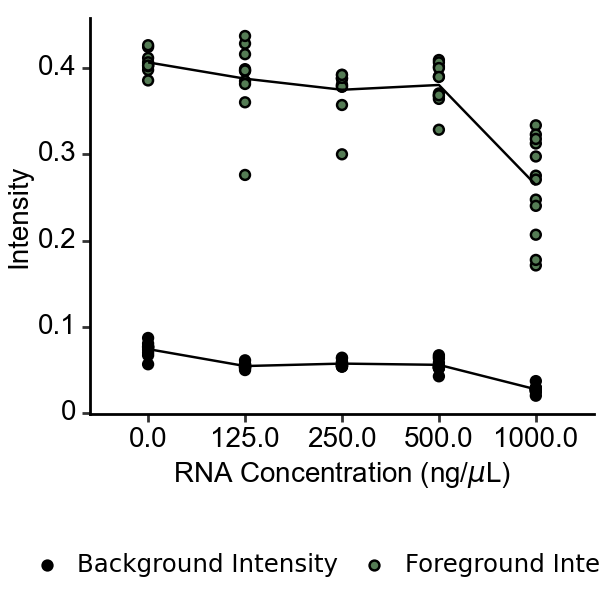

<Figure Size: (300 x 300)>

In [60]:
data = pd.read_csv(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TBP + RNA\\TBP + RNA_condensed_fractions.csv")
data = data[data["dir_name"] != "RNA_ONLY"]
data["dir_name"] = data["dir_name"].astype("float")
data["dir_name"] = pd.Categorical(data["dir_name"], ordered=True,
                                  categories=sorted(np.unique(data["dir_name"]).tolist()))
data = data[["prep", "dir_name", "mean_bg_intensity", "mean_fg_intensity"]].melt(
    id_vars=["prep", "dir_name"])
data.loc[data["variable"] == "mean_bg_intensity", "variable"] = "Background Intensity"
data.loc[data["variable"] == "mean_fg_intensity", "variable"] = "Foreground Intensity"

data_means = data.copy()
data_means = data_means.groupby(["prep", "dir_name", "variable"]).mean().reset_index()

plot = (
        pn.ggplot(data, pn.aes(x="dir_name", y="value", fill="variable"))
        + pn.geom_point()

        + pn.geom_line(data_means, pn.aes(group="variable"))
        + pn.labs(x="RNA Concentration (ng/$\mu$L)", y="Intensity", color="", fill="",
                  shape="")
        + pn.theme_classic()
        + pn.theme(figure_size=(3, 3),
                   legend_position="bottom",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.scale_fill_manual(values=["#000000", "#557C55"])
    # + pn.geom_jitter()
)
plot

In [62]:
pn.ggsave(plot,
          "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\supplementary\\bg_vs_fg_intensities\\TBP+RNA.pdf",
          dpi=1200, width=120, height=80, units="mm")

C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 120.00000000000001 x 80.0 mm image.
C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: C:\Users\danie\OneDrive - University of Cape Town\Hons Project\DataAnalysis\new_analysis_20231031\supplementary\bg_vs_fg_intensities\TBP+RNA.pdf


## Analysis of TBP + DNA Data

In [4]:
data = pd.read_excel(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TBP + DNA\\TBP with and without DNA.xlsx")
fl_data = pd.read_csv(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TBP + DNA\\TBP FL_regions.csv")
fl_data["prep"] = "TBP FL"
fl_data = fl_data[fl_data["dir_name"] == 9]
data = pd.concat([data, fl_data])
data.loc[data["dir_name"] == 0, "prep"] = "TBP FL"
data.loc[data["dir_name"] == 0, "dir_name"] = 9
data.loc[data["prep"] == 'TBP + DNA 200ng Redo', "prep"] = "TBP + DNA"
data = data[data["area"] >= 50]

data["area_log"] = np.log10(data["area"])
data["dir_name"] = pd.Categorical(data["dir_name"], ordered=True,
                                  categories=sorted(np.unique(data["dir_name"]).tolist()))
data["circularity"] = (4 * np.pi * data["area"]) / (data["perimeter"] ** 2)

In [ ]:
plot = (

        pn.ggplot(data, pn.aes(x="dir_name", y="area_log", fill="prep", color="prep"))
        # + pn.geom_jitter()
        + pn.geom_boxplot()

)

plot

## Analysis of TBP + TFIIB IDR Data

In [ ]:
data = pd.read_excel(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TBP Core +- TFIIB IDR\\condensed_fractions.xlsx")

data["prep"] = pd.Categorical(data["prep"], ordered=True, categories=[
    'TBP FL',
    'TBP Core',
    'TBP IDR',
    'IIB FL + TBP FL',
    'IIB FL + TBP CORE',
    'IIBFL + TBP IDR',
    'IIB IDR + TBP FL',
    'IIB IDR + TBP Core',
    'IIB IDR + TBP IDR',
])
data.loc[data["group"] == "FL", "group"] = "TBP FL"
data.loc[data["group"] == "CORE", "group"] = "TBP C"
data.loc[data["group"] == "IDR", "group"] = "TBP IDR"

data["group"] = pd.Categorical(data["group"], ordered=True, categories=["TBP FL", "TBP C", "TBP IDR"])

data["IIBRegion"] = pd.Categorical(data["IIBRegion"], ordered=True, categories=["TBP", "FL", "IDR"])

In [ ]:
plot = (
        pn.ggplot(data[data["group"] == "TBP C"], pn.aes(x="IIBRegion", y="condensed_fraction", fill="prep")) +
        pn.geom_boxplot(outlier_alpha=0)
        + pn.geom_jitter(alpha=0.5)
        + pn.scale_fill_manual(
    values=["#31688e", "#35b779", "#440154", "#fc8d62", "#fc8d62", "#fc8d62", "#8da0cb", "#8da0cb", "#8da0cb"])
        # Values: TBP FL, IIB + TBP FL, TBP Core, IIB + TBP Core, TBP IDR, IIB IDR + TBP IDR
        # + pn.scale_color_manual(values=["#000000", "#31688e", "#000000", "#35b779", "#000000", "#440154"])
        + pn.scale_x_discrete(labels=["TBP Only", "+ IIB FL", "+ IIB IDR"])
        + pn.labs(x="", y="Condensed Fraction")

        + pn.theme_classic()
        + pn.facet_wrap("~group", scales="free_x", ncol=1)
        + pn.annotate("segment", x="TBP", xend="TBP", y=0, yend=0, color="black", size=0.5)
        + pn.theme(figure_size=(3, 3),
                   legend_position="none",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"),
                   axis_text_x=pn.element_text(angle=0),
                   panel_spacing_y=0.1)

)

plot

In [ ]:
pn.ggsave(plot,
          "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TBP Core +- TFIIB IDR\\TBP_Core_plus_IIB.svg",
          dpi=1200, width=3, height=3, units="in")

## Analysing how the condensed fraction of TFIIB changes with and without DNA

In [ ]:
regions_comp = pd.read_excel(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB cond fraction accross conditions\\cf_data.xlsx",
    sheet_name="regions")

regions_comp["dir_name"] = regions_comp["dir_name"].astype("float")
regions_comp["conc"] = 0.0
regions_comp.loc[regions_comp["prep"] == "HsTFIIB Only", "conc"] = 113 / regions_comp["dir_name"]
regions_comp.loc[regions_comp["prep"] == "HSTFIIB + RNA", "conc"] = regions_comp.loc[
    regions_comp["prep"] == "HSTFIIB + RNA", "dir_name"]

regions_comp["conc"] = np.round(regions_comp["conc"], 1)

regions_comp["conc"] = pd.Categorical(regions_comp["conc"], ordered=True,
                                      categories=sorted(np.unique(regions_comp["conc"]).tolist()))

regions_comp = regions_comp[regions_comp["area"] > 10]
regions_comp["log_area"] = np.log10(regions_comp["area"])
regions_comp = regions_comp[(regions_comp["prep"] == "HsTFIIB + RNA") | (
        (regions_comp["prep"] == "HsTFIIB Only") & (regions_comp["conc"] == 3.5))]

In [ ]:
plot = (
        pn.ggplot(regions_comp, pn.aes(x="conc", y="mean_intensity", fill="prep"))
        + pn.geom_jitter()
        + pn.facet_wrap("~prep", scales="free_x")
)
plot

In [ ]:
tfii_vs_dna_vs_rna = pd.read_excel(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB cond fraction accross conditions\\cf_data.xlsx")
tfii_vs_dna_vs_rna["image_name"] = tfii_vs_dna_vs_rna["image_name"].astype("str")
# iib_tbp_titration["fold_intensity"] = iib_tbp_titration["mean_fg_intensity"] / iib_tbp_titration[
# "mean_bg_intensity"]

# iib_tbp_titration = iib_tbp_titration[iib_tbp_titration["dir_name"] != "NoMg"]



In [ ]:
tfii_vs_dna_vs_rna

In [ ]:
tfii_vs_dna_vs_rna["image_name"].str.contains("Blue3")

In [ ]:
tfii_vs_dna_vs_rna["channel"] = ""
tfii_vs_dna_vs_rna.loc[tfii_vs_dna_vs_rna["image_name"].str.contains("Blue3"), "channel"] = "TFIIB"
tfii_vs_dna_vs_rna.loc[tfii_vs_dna_vs_rna["image_name"].str.contains("Green"), "channel"] = "TBP"
# tfii_vs_dna_vs_rna.loc[tfii_vs_dna_vs_rna["channel"] == "", "channel"] = "Merged"

In [ ]:

# tfii_vs_dna_vs_rna["dir_name"] = tfii_vs_dna_vs_rna["dir_name"].astype("int")

# tfii_vs_dna_vs_rna["conc"] = tfii_vs_dna_vs_rna.apply(lambda row: fix_concentration(row, constructs), axis=1)

tfii_vs_dna_vs_rna["conc"] = np.round(tfii_vs_dna_vs_rna["conc"], 1)

tfii_vs_dna_vs_rna["conc"] = pd.Categorical(tfii_vs_dna_vs_rna["conc"], ordered=True,
                                            categories=sorted(
                                                np.unique(tfii_vs_dna_vs_rna["conc"]).tolist()))


In [ ]:
plot = (
        pn.ggplot(tfii_vs_dna_vs_rna[tfii_vs_dna_vs_rna["channel"] != "Merged"],
                  pn.aes(x="conc", y="condensed_fraction"))
        + pn.geom_boxplot(pn.aes(), outlier_alpha=0)
        + pn.geom_jitter(pn.aes(color="channel"), width=0.1)
        + pn.theme_classic()
        + pn.labs(x="YFP-HsTBP-FL Concentration ($\mu$M)", y="Condensed phase intensity", color="", fill="",
                  shape="")
        + pn.theme(figure_size=(8, 4),
                   legend_position="none",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.facet_wrap("~prep", scales="free")
        + pn.scale_color_manual(values=["#190482", "#004225", "#D80032"])
)
plot

In [ ]:
pn.ggsave(plot,
          "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB cond fraction accross conditions\\condensed_phase_intensity.svg",
          dpi=1200, width=210, height=90, units="mm")

In [ ]:
iib_tbp_titration = pd.read_csv(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB + TBP Titration\\TFIIB + TBP Titration_condensed_fractions.csv")

iib_tbp_titration["fold_intensity"] = iib_tbp_titration["mean_fg_intensity"] / iib_tbp_titration[
    "mean_bg_intensity"]

iib_tbp_titration = iib_tbp_titration[iib_tbp_titration["dir_name"] != "NoMg"]

iib_tbp_titration["channel"] = ""
iib_tbp_titration.loc[iib_tbp_titration["image_name"].str.contains("Blue3"), "channel"] = "TFIIB"
iib_tbp_titration.loc[iib_tbp_titration["image_name"].str.contains("Green"), "channel"] = "TBP"
iib_tbp_titration.loc[iib_tbp_titration["channel"] == "", "channel"] = "Merged"
iib_tbp_titration["dir_name"] = iib_tbp_titration["dir_name"].astype("int")

iib_tbp_titration["conc"] = iib_tbp_titration.apply(lambda row: fix_concentration(row, constructs), axis=1)

iib_tbp_titration["conc"] = np.round(iib_tbp_titration["conc"], 1)

iib_tbp_titration["conc"] = pd.Categorical(iib_tbp_titration["conc"], ordered=True,
                                           categories=sorted(
                                               np.unique(iib_tbp_titration["conc"]).tolist()))


In [ ]:
plot = (
        pn.ggplot(iib_tbp_titration[iib_tbp_titration["channel"] != "Merged"], pn.aes(x="conc", y="mean_fg_intensity"))
        + pn.geom_boxplot(pn.aes(), outlier_alpha=0)
        + pn.geom_jitter(pn.aes(color="channel"), width=0.1)
        + pn.theme_classic()
        + pn.labs(x="YFP-HsTBP-FL Concentration ($\mu$M)", y="Condensed phase intensity", color="", fill="",
                  shape="")
        + pn.theme(figure_size=(8, 4),
                   legend_position="none",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.facet_wrap("~channel")
        + pn.scale_color_manual(values=["#190482", "#004225", "#D80032"])
)
plot

In [ ]:
pn.ggsave(plot,
          "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB + TBP Titration\\condensed_phase_intensity.svg",
          dpi=1200, width=210, height=90, units="mm")

In [37]:
iib_tbp_dna_regions = pd.read_csv(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB + TBP + DNA\\TFIIB + TBP + DNA_regions.csv",
    low_memory=False)

iib_tbp_dna_regions = iib_tbp_dna_regions[iib_tbp_dna_regions["dir_name"] != "NoMg"]

iib_tbp_dna_regions["channel"] = ""
iib_tbp_dna_regions.loc[iib_tbp_dna_regions["image_name"].str.contains("Blue1"), "channel"] = "DNA"
iib_tbp_dna_regions.loc[iib_tbp_dna_regions["image_name"].str.contains("Green"), "channel"] = "TBP"
iib_tbp_dna_regions.loc[iib_tbp_dna_regions["image_name"].str.contains("Blue6"), "channel"] = "TFIIB"
iib_tbp_dna_regions.loc[iib_tbp_dna_regions["channel"] == "", "channel"] = "Merged"
iib_tbp_dna_regions["dir_name"] = iib_tbp_dna_regions["dir_name"].astype("int")
iib_tbp_dna_regions["dir_name"] = pd.Categorical(iib_tbp_dna_regions["dir_name"], ordered=True,
                                                 categories=sorted(
                                                     np.unique(iib_tbp_dna_regions["dir_name"]).tolist()))


In [38]:
iib_tbp_dna_regions

,area,mean_intensity,perimeter,axis_major_length,axis_minor_length,prep,dir_name,image_name,channel
0,883.0,0.131418,112.325902,36.657245,30.770792,TFIIB + TBP + DNA,0,Export_0ngul_DNA_000_RGB_BrightfieldBlue6,TFIIB
1,160.0,0.104167,45.798990,14.919853,13.683197,TFIIB + TBP + DNA,0,Export_0ngul_DNA_000_RGB_BrightfieldBlue6,TFIIB
2,304.0,0.117086,65.526912,20.251293,19.233059,TFIIB + TBP + DNA,0,Export_0ngul_DNA_000_RGB_BrightfieldBlue6,TFIIB
3,191.0,0.108434,51.455844,16.460351,14.889517,TFIIB + TBP + DNA,0,Export_0ngul_DNA_000_RGB_BrightfieldBlue6,TFIIB
4,215.0,0.107132,53.213203,17.032720,16.130671,TFIIB + TBP + DNA,0,Export_0ngul_DNA_000_RGB_BrightfieldBlue6,TFIIB
...,...,...,...,...,...,...,...,...,...
64434,70.0,0.215502,31.798990,12.840270,7.143722,TFIIB + TBP + DNA,50,Export_50ngul_DNA_032_RGB_BrightfieldGreen,TBP
64435,34.0,0.217260,19.656854,7.697941,5.690504,TFIIB + TBP + DNA,50,Export_50ngul_DNA_032_RGB_BrightfieldGreen,TBP
64436,8.0,0.201294,7.035534,3.752200,2.769657,TFIIB + TBP + DNA,50,Export_50ngul_DNA_032_RGB_BrightfieldGreen,TBP
64437,23.0,0.215657,15.656854,6.359467,4.590973,TFIIB + TBP + DNA,50,Export_50ngul_DNA_032_RGB_BrightfieldGreen,TBP


In [39]:
iib_tbp_dna_regions["log_area"] = np.log10(iib_tbp_dna_regions["area"])

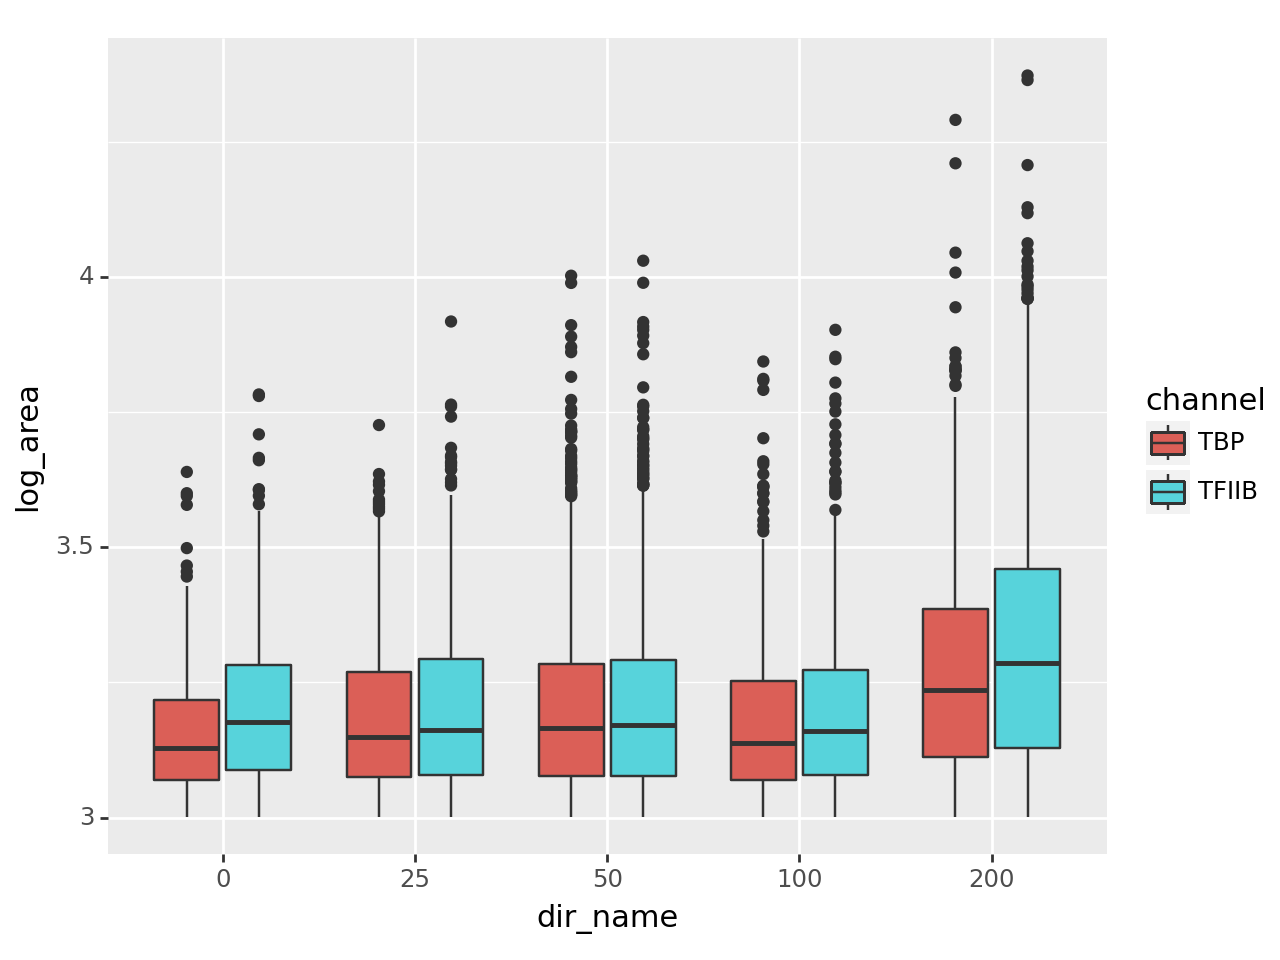

<Figure Size: (640 x 480)>

In [44]:
(
        pn.ggplot(
            iib_tbp_dna_regions[(iib_tbp_dna_regions["channel"] != "Merged") & (iib_tbp_dna_regions["area"] > 1000)],
            pn.aes(x="dir_name", y="log_area", fill="channel"))
        + pn.geom_boxplot(pn.aes())
)

In [2]:
iib_tbp_dna_cf = pd.read_csv(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB + TBP + DNA\\TFIIB + TBP + DNA_condensed_fractions.csv")

iib_tbp_dna_cf["fold_intensity"] = iib_tbp_dna_cf["mean_fg_intensity"] / iib_tbp_dna_cf[
    "mean_bg_intensity"]

iib_tbp_dna_cf = iib_tbp_dna_cf[iib_tbp_dna_cf["dir_name"] != "NoMg"]

iib_tbp_dna_cf["channel"] = ""
iib_tbp_dna_cf.loc[iib_tbp_dna_cf["image_name"].str.contains("Blue1"), "channel"] = "DNA"
iib_tbp_dna_cf.loc[iib_tbp_dna_cf["image_name"].str.contains("Green"), "channel"] = "TBP"
iib_tbp_dna_cf.loc[iib_tbp_dna_cf["image_name"].str.contains("Blue6"), "channel"] = "TFIIB"
iib_tbp_dna_cf.loc[iib_tbp_dna_cf["channel"] == "", "channel"] = "Merged"
iib_tbp_dna_cf["dir_name"] = iib_tbp_dna_cf["dir_name"].astype("int")
iib_tbp_dna_cf["dir_name"] = pd.Categorical(iib_tbp_dna_cf["dir_name"], ordered=True,
                                            categories=sorted(
                                                np.unique(iib_tbp_dna_cf["dir_name"]).tolist()))


In [3]:
iib_tbp_dna_cf

,condensed_fraction,mean_intensity,std_intensity,max_intensity,min_intensity,mean_entropy,mean_bg_intensity,mean_fg_intensity,prep,dir_name,image_name,fold_intensity,channel
0,0.039895,0.035933,0.023063,0.208333,0.011667,0,0.031847,0.134266,TFIIB + TBP + DNA,0,Export_0ngul_DNA_000_RGB_BrightfieldBlue6,4.215953,TFIIB
1,0.031112,0.035238,0.020857,0.208333,0.013333,0,0.032017,0.135567,TFIIB + TBP + DNA,0,Export_0ngul_DNA_001_RGB_BrightfieldBlue6,4.234249,TFIIB
2,0.041386,0.033956,0.023030,0.203333,0.010833,0,0.029818,0.129789,TFIIB + TBP + DNA,0,Export_0ngul_DNA_002_RGB_BrightfieldBlue6,4.352632,TFIIB
3,0.036028,0.027032,0.018549,0.200000,0.007500,0,0.023985,0.108567,TFIIB + TBP + DNA,0,Export_0ngul_DNA_003_RGB_BrightfieldBlue6,4.526458,TFIIB
4,0.026705,0.022510,0.014769,0.191667,0.006667,0,0.020458,0.097280,TFIIB + TBP + DNA,0,Export_0ngul_DNA_004_RGB_BrightfieldBlue6,4.754989,TFIIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.067407,0.125367,0.094827,0.858380,0.037487,0,0.102840,0.437038,TFIIB + TBP + DNA 2,50,Export_50ngul_DNA_028_RGB,4.249702,Merged
232,0.056065,0.113554,0.081992,0.787594,0.031846,0,0.096126,0.406992,TFIIB + TBP + DNA 2,50,Export_50ngul_DNA_029_RGB,4.233965,Merged
233,0.080566,0.142246,0.096988,0.834997,0.037175,0,0.117219,0.427865,TFIIB + TBP + DNA 2,50,Export_50ngul_DNA_030_RGB,3.650137,Merged
234,0.078853,0.139327,0.098455,0.838344,0.029339,0,0.114094,0.434099,TFIIB + TBP + DNA 2,50,Export_50ngul_DNA_031_RGB,3.804742,Merged


In [4]:
iib_tbp_dna_cf["fold_intensity"] = iib_tbp_dna_cf["mean_fg_intensity"] / iib_tbp_dna_cf["mean_bg_intensity"]

In [5]:
iib_tbp_dna_cf["log_fold_intensity"] = np.log2(iib_tbp_dna_cf["fold_intensity"])

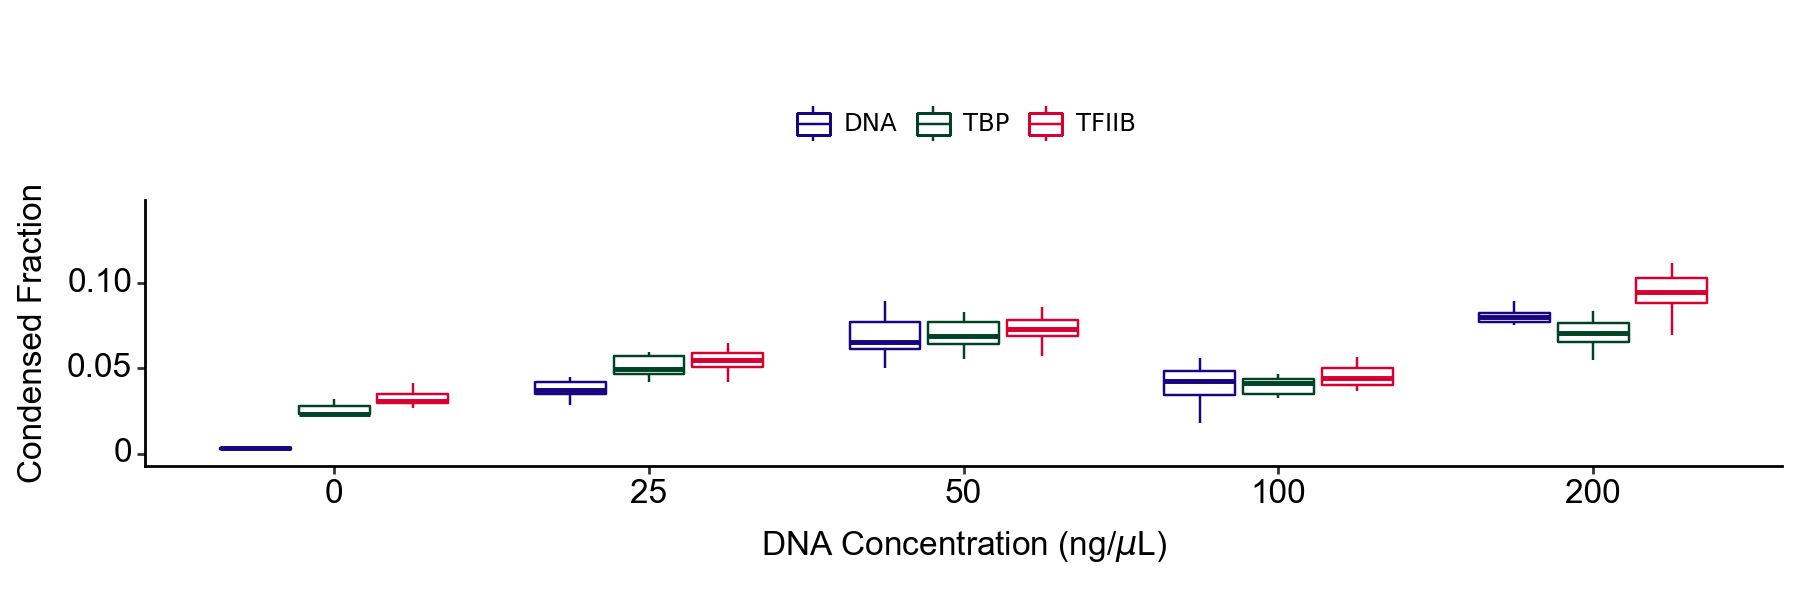

<Figure Size: (900 x 300)>

In [8]:
plot = (
        pn.ggplot(iib_tbp_dna_cf[iib_tbp_dna_cf["channel"] != "Merged"], pn.aes(x="dir_name",
                                                                                y="condensed_fraction",
                                                                                ))

        + pn.geom_boxplot(pn.aes(color="channel"), outlier_alpha=0)
        # + pn.geom_jitter(pn.aes(color="channel"), width=0.1)
        + pn.theme_classic()
        + pn.labs(x="DNA Concentration (ng/$\mu$L)", y="Condensed Fraction", color="", fill="",
                  shape="")
        + pn.theme(figure_size=(9, 3),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=12, family="Arial"),
                   axis_title=pn.element_text(color="black", size=12, family="Arial"))
        + pn.scale_color_manual(values=["#190482", "#004225", "#D80032"])
)
plot

In [9]:
pn.ggsave(plot,
          "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB + TBP + DNA\\condensed_fraction.svg",
          dpi=1200, width=206, height=100, units="mm")

C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 206.0 x 100.0 mm image.
C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: C:\Users\danie\OneDrive - University of Cape Town\Hons Project\DataAnalysis\new_analysis_20231031\TFIIB + TBP + DNA\condensed_fraction.svg


In [ ]:
iib_idr_tbp_cf = pd.read_csv(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB IDR + TBP all\\TFIIB IDR + TBP_condensed_fractions.csv")

iib_idr_tbp_cf["fold_intensity"] = iib_idr_tbp_cf["mean_fg_intensity"] / iib_idr_tbp_cf[
    "mean_bg_intensity"]

iib_idr_tbp_cf["channel"] = ""
iib_idr_tbp_cf.loc[iib_idr_tbp_cf[a
"image_name"].str.contains("Blue"), "channel"] = "TFIIB"
iib_idr_tbp_cf.loc[iib_idr_tbp_cf["image_name"].str.contains("Blue2"), "channel"] = "TBP"
iib_idr_tbp_cf.loc[iib_idr_tbp_cf["channel"] == "", "channel"] = "Merged"

iib_idr_tbp_cf["dir_name"] = pd.Categorical(iib_idr_tbp_cf["dir_name"], ordered=True,
                                            categories=sorted(
                                                np.unique(iib_idr_tbp_cf["dir_name"]).tolist()))


In [ ]:
iib_idr_tbp_cf

In [ ]:
plot = (
        pn.ggplot(iib_idr_tbp_cf[iib_idr_tbp_cf["channel"] != "Merged"], pn.aes(x="dir_name",
                                                                                y="fold_intensity",
                                                                                fill="channel",
                                                                                color="channel"))
        # + pn.geom_jitter(pn.aes(), width=0.1)
        + pn.geom_boxplot(pn.aes())
        + pn.theme_classic()
        + pn.labs(x="Mixing Experiment", y="Fold Intensity", color="", fill="",
                  shape="")
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.facet_grid("x~.")
)
plot

In [ ]:

iib_tbp_constructs_cf, iib_constructs_regions = load_df(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB FL + TBP all_quant",
    "")






In [ ]:
iib_tbp_constructs_cf["fold_intensity"] = iib_tbp_constructs_cf["mean_fg_intensity"] / iib_tbp_constructs_cf[
    "mean_bg_intensity"]

In [ ]:
iib_tbp_constructs_cf["channel"] = ""
iib_tbp_constructs_cf.loc[iib_tbp_constructs_cf["image_name"].str.contains("Blue"), "channel"] = "TFIIB"
iib_tbp_constructs_cf.loc[iib_tbp_constructs_cf["image_name"].str.contains("Red"), "channel"] = "TBP"
iib_tbp_constructs_cf.loc[iib_tbp_constructs_cf["channel"] == "", "channel"] = "Merged"

In [ ]:
iib_tbp_constructs_cf["dir_name"] = pd.Categorical(iib_tbp_constructs_cf["dir_name"], ordered=True,
                                                   categories=sorted(
                                                       np.unique(iib_constructs_regions["dir_name"]).tolist()))

In [ ]:
plot = (
        pn.ggplot(iib_tbp_constructs_cf[iib_tbp_constructs_cf["channel"] != "Merged"], pn.aes(x="dir_name",
                                                                                              y="condensed_fraction",
                                                                                              fill="channel"))
        # + pn.geom_jitter(pn.aes(), width=0.1)
        + pn.geom_boxplot(pn.aes())
        + pn.theme_classic()
        + pn.labs(x="Mixing Experiment", y="Fold Intensity", color="", fill="",
                  shape="")
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
)
plot

In [ ]:
pn.ggsave(plot,
          "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB FL + TBP all_quant\\condensed_fraction.png",
          dpi=1200, width=80, height=80, units="mm")

In [ ]:
# constructs = {
#
#     "TFIIB FL": 113,
#     "TFIIB Core": 28,
#     "TFIIB IDR": 153,
# }

constructs = {

    "TBP FL": 9,
    "TBP Core": 23,
    "TBP IDR": 63,
}


In [ ]:
def fix_concentration(row, constructs):
    if row["dir_name"] > 0:
        return constructs["TBP IDR"] / row["dir_name"]
    else:
        return 0

In [ ]:
def load_construct_regions_and_cfs(constructs, base_dir, fix_conc=False):
    regions_dfs = []
    condensed_fraction_dfs = []

    for key in constructs.keys():
        temp = pd.read_csv(base_dir / key / f"{key}_regions.csv")
        temp["prep"] = key
        regions_dfs.append(temp)
        temp = pd.read_csv(base_dir / key / f"{key}_condensed_fractions.csv")
        temp["prep"] = key
        condensed_fraction_dfs.append(temp)

    regions = pd.concat(regions_dfs)
    condensed_fractions = pd.concat(condensed_fraction_dfs)

    if fix_conc:
        condensed_fractions["conc"] = condensed_fractions.apply(lambda row: fix_concentration(row, constructs), axis=1)

    return regions, condensed_fractions


In [5]:
base_dir = Path(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031")

In [ ]:
regions, condensed_fractions = load_construct_regions_and_cfs(constructs, base_dir, fix_conc=True)

In [ ]:
temp = condensed_fractions[["prep", "conc", "condensed_fraction"]]

In [ ]:
temp.columns = ["colour", "x", "y"]

In [ ]:

temp.loc[:, "x"] = temp["x"].astype("category")
temp.loc[:, "log_y"] = np.log10(temp["y"] + 1)

In [ ]:
# replacement = {
#     0.21875: 0.5,
#     0.4375: 0.5,
#     0.59765625: 0.5,
#     0.875: 1,
#     0.8828125: 1,
#     1.1953125: 1,
#     1.75: 2,
#     1.765625: 2,
#     2.390625: 2,
#     3.5: 3.5,
#     3.53125: 3.5,
#     4.78125: 5,
#     7.0: 7,
#     7.0625: 7,
#     9.5625: 9,
#     14.125: 14,
#     19.125: 20,
#     28.25: 28,
#     38.25: 38
# }

In [ ]:
replacement = {
    0.11842105263157894: 0.1,
    0.12849162011173185: 0.1,
    0.23684210526315788: 0.1,
    0.25842696629213485: 0.1,
    0.47368421052631576: 0.5,
    0.4921875: 0.5,
    0.5227272727272727: 0.5,
    0.984375: 1,
    1.0: 1,
    1.0454545454545454: 1,
    1.96875: 2,
    2.090909090909091: 2,
    2.25: 2,
    3.9375: 4,
    4.5: 5,
    4.6: 5,
    7.875: 8,
    11.5: 11,
    15.75: 16
}

In [ ]:
def help(row):
    if row["x"] in replacement.keys():
        return replacement[row["x"]]
    else:
        return row["x"]

In [ ]:
temp.loc[:, "x"] = temp.apply(lambda row: help(row), axis=1)

In [ ]:
temp.loc[:, "x"] = temp["x"].astype("category")

In [ ]:
temp["colour"] = temp["colour"].astype("str")

In [ ]:
temp[temp["colour"] == "TBP Core"] = "TBP C"

In [ ]:
temp["x"] = temp["x"].astype("float")

In [ ]:
np.unique(temp["x"]).tolist()

In [ ]:
temp.loc[temp["colour"] == "TBP IDR", "y"] = 0

In [ ]:
temp[temp["colour"] == "TBP IDR"]

In [ ]:
plot = (
        pn.ggplot(temp, pn.aes(x="x", y="y", shape="colour", fill="colour", color="colour"))
        # + pn.geom_point()
        + pn.geom_boxplot()
        + pn.theme_classic()
        + pn.labs(x="Concentration ($\mu$M)", y="Condensed Fraction", color="", fill="",
                  shape="")
        + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
        + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
plot.save(base_dir / "condensed_fraction_boxplot_tbp.svg", dpi=1200, width=80, height=80, units="mm")

In [ ]:
# # TFIIB Colours:
# + pn.scale_fill_manual(values=["#66c2a5", "#fc8d62", "#8da0cb"])
#         + pn.scale_color_manual(values=["#3a6b5c", "#a1583b", "#5d6a87"])

In [6]:
rna_tfiib_regions = pd.read_csv(base_dir / "TFIIB + RNA" / "HSTFIIB + RNA_regions.csv")
rna_tfiib_cf = pd.read_csv(base_dir / "TFIIB + RNA" / "HSTFIIB + RNA_condensed_fractions.csv")
rna_tfiib_cf = rna_tfiib_cf[rna_tfiib_cf["dir_name"] != "RNA_control"]
rna_tfiib_cf["dir_name"] = rna_tfiib_cf["dir_name"].astype("int")

rna_tfiib_cf["dir_name"] = pd.Categorical(rna_tfiib_cf["dir_name"], ordered=True,
                                          categories=sorted(np.unique(rna_tfiib_regions["dir_name"]).tolist()))

In [7]:
rna_tfiib_cf["fg_vs_bg"] = rna_tfiib_cf["mean_fg_intensity"] / rna_tfiib_cf["mean_bg_intensity"]
rna_tfiib_cf

,condensed_fraction,mean_intensity,std_intensity,max_intensity,min_intensity,mean_entropy,mean_bg_intensity,mean_fg_intensity,prep,dir_name,image_name,fg_vs_bg
0,0.032840,0.044350,0.015657,0.887576,0.022500,0.0,0.042002,0.113491,HSTFIIB + RNA,0,0ng_ul,2.702022
1,0.031635,0.044534,0.015672,0.904826,0.005833,0.0,0.042241,0.114738,HSTFIIB + RNA,0,0ng_ul001,2.716289
2,0.029627,0.045048,0.014418,0.907052,0.011667,0.0,0.043017,0.111561,HSTFIIB + RNA,0,0ng_ul002,2.593415
3,0.020518,0.043486,0.011733,0.921629,0.011667,0.0,0.042163,0.106653,HSTFIIB + RNA,0,0ng_ul003,2.529530
4,0.016402,0.042026,0.011681,0.912432,0.008333,0.0,0.040851,0.112490,HSTFIIB + RNA,0,0ng_ul004,2.753685
...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.072555,0.053182,0.027564,0.930045,0.013639,0.0,0.046659,0.136565,HSTFIIB + RNA,62,62ng_ul003,2.926870
67,0.070770,0.054522,0.027780,0.918399,0.021667,0.0,0.048040,0.139627,HSTFIIB + RNA,62,62ng_ul004,2.906444
68,0.066128,0.050523,0.029165,0.880084,0.018333,0.0,0.043913,0.143875,HSTFIIB + RNA,62,62ng_ul005,3.276371
69,0.063743,0.048270,0.029585,0.933491,0.007805,0.0,0.041663,0.145314,HSTFIIB + RNA,62,62ng_ul006,3.487851


In [55]:
temp = dna_tfiib_cf.melt(id_vars=["dir_name"], value_vars=["mean_fg_intensity", "mean_bg_intensity"])
temp.loc[temp["variable"] == "mean_fg_intensity", "variable"] = "Foreground"
temp.loc[temp["variable"] == "mean_bg_intensity", "variable"] = "Background"
temp = temp.reset_index()

In [58]:
temp["mean"] = temp.groupby(["dir_name", "variable"])["value"].transform("mean")

C:\Users\danie\AppData\Local\Temp\ipykernel_35168\2363217759.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [10]:
temp = temp.groupby(["dir_name", "variable"])["value"].agg(["mean", "std", "count"]).reset_index()

C:\Users\danie\AppData\Local\Temp\ipykernel_35168\1452460344.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [11]:
temp["std_err"] = temp["std"] / np.sqrt(temp["count"])

In [12]:
temp["mean_plus_two_std_errs"] = temp["mean"] + 2 * temp["std_err"]
temp["mean_minus_two_std_errs"] = temp["mean"] - 2 * temp["std_err"]

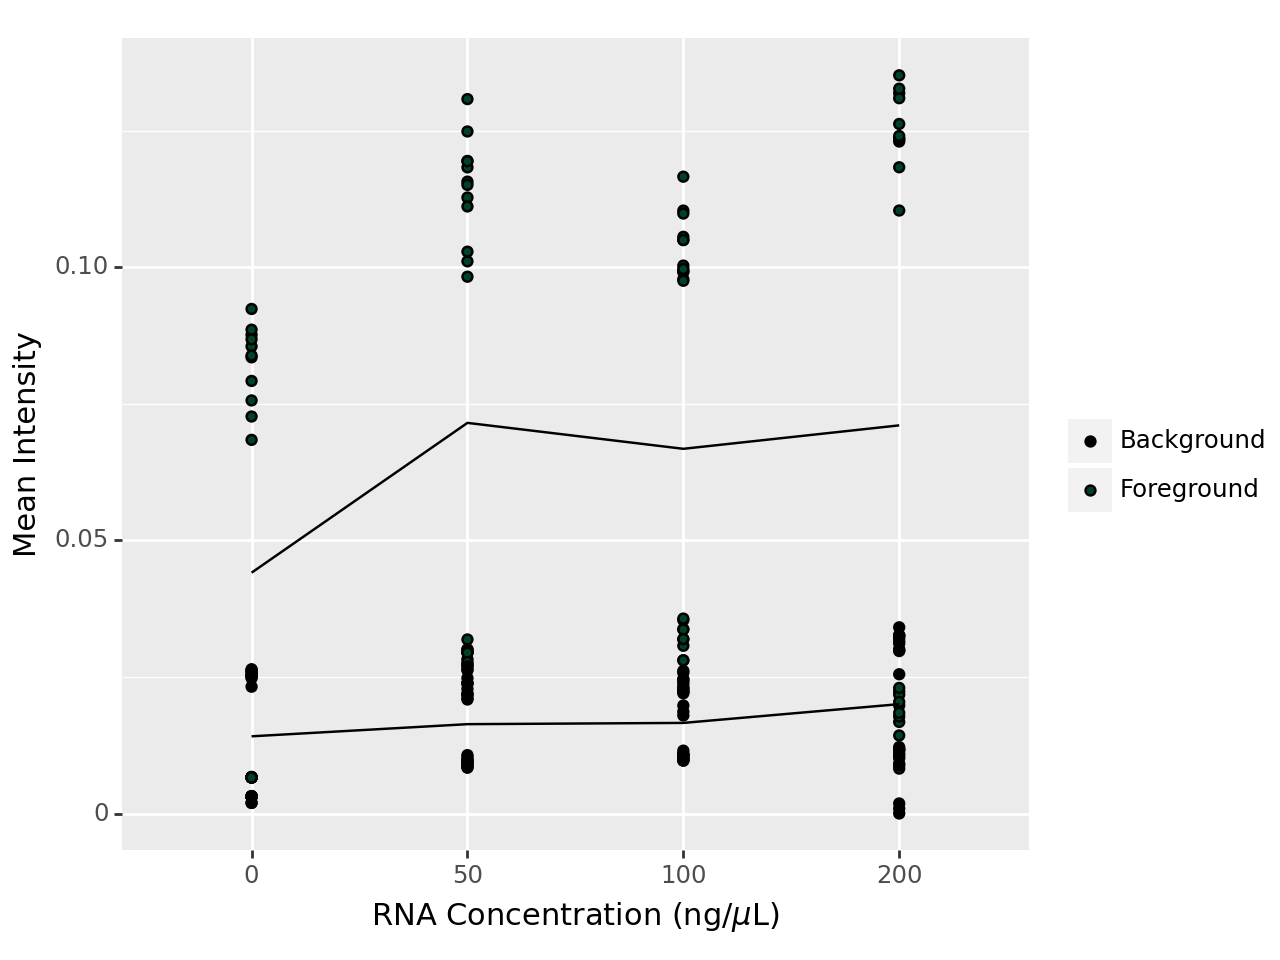

<Figure Size: (640 x 480)>

In [59]:
plot = (
        pn.ggplot(temp, pn.aes(x="dir_name", y="value", fill="variable"))
        + pn.geom_point()
        + pn.geom_line(pn.aes(y="mean", group="variable"))
        # + pn.geom_errorbar(pn.aes(ymin="mean_minus_two_std_errs", ymax="mean_plus_two_std_errs"), width=0.2)
        # + pn.geom_smooth(pn.aes(group="variable"), method="lm")
        + pn.labs(x="RNA Concentration (ng/$\mu$L)", y="Mean Intensity", color="", fill="",
                  shape="")
        + pn.scale_fill_manual(values=["#000000", "#004225"])

)

plot

In [53]:
pn.ggsave(plot,
          "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\supplementary\\bg_vs_fg_intensities\\tfiib+rna.svg",
          dpi=1200, width=120, height=80, units="mm")

C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 120.00000000000001 x 80.0 mm image.
C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: C:\Users\danie\OneDrive - University of Cape Town\Hons Project\DataAnalysis\new_analysis_20231031\supplementary\bg_vs_fg_intensities\tfiib+rna.svg


In [ ]:
plot = (
        pn.ggplot(rna_tfiib_cf, pn.aes(x="dir_name", y="fg_vs_bg"))

        + pn.geom_boxplot()
        + pn.geom_jitter(colour="#C70039", alpha=0.75)
        + pn.theme_classic()
        + pn.labs(x="RNA Concentration (ng/$\mu$L)", y="Fold Intensity", color="", fill="",
                  shape="")
        # + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
    # + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
    # + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
pn.ggsave(plot, base_dir / "TFIIB + RNA" / "fold_intensity.svg", dpi=1200, width=80, height=80, units="mm")

In [54]:
dna_tfiib_regions = pd.read_csv(base_dir / "TFIIB + DNA" / "TFIIB + DNA_regions.csv")
dna_tfiib_cf = pd.read_csv(base_dir / "TFIIB + DNA" / "TFIIB + DNA_condensed_fractions.csv")
dna_tfiib_cf = dna_tfiib_cf[dna_tfiib_cf["dir_name"] != "RNA_control"]
dna_tfiib_cf["dir_name"] = dna_tfiib_cf["dir_name"].astype("int")

dna_tfiib_cf["dir_name"] = pd.Categorical(dna_tfiib_cf["dir_name"], ordered=True,
                                          categories=sorted(np.unique(dna_tfiib_regions["dir_name"]).tolist()))

In [ ]:
dna_tfiib_cf["channel"] = None
dna_tfiib_regions["channel"] = None

In [ ]:
dna_tfiib_cf.loc[dna_tfiib_cf["image_name"].str.contains("Blue"), "channel"] = "TFIIB"
dna_tfiib_cf.loc[dna_tfiib_cf["image_name"].str.contains("Red"), "channel"] = "DNA"

dna_tfiib_regions.loc[dna_tfiib_regions["image_name"].str.contains("Blue"), "channel"] = "TFIIB"
dna_tfiib_regions.loc[dna_tfiib_regions["image_name"].str.contains("Red"), "channel"] = "DNA"

In [ ]:
dna_tfiib_cf["fg_vs_bg"] = dna_tfiib_cf["mean_fg_intensity"] / dna_tfiib_cf["mean_bg_intensity"]

In [ ]:
plot = (
        pn.ggplot(dna_tfiib_cf[dna_tfiib_cf["channel"] == "TFIIB"], pn.aes(x="dir_name", y="condensed_fraction"))
        + pn.geom_boxplot(outlier_alpha=0)
        + pn.geom_jitter(colour="#C70039", alpha=0.75, width=0.2)
        + pn.theme_classic()
        + pn.labs(x="DNA Concentration (ng/$\mu$L)", y="Condensed Fraction", color="", fill="",
                  shape="")
        # + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
    # + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
    # + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
pn.ggsave(plot, base_dir / "TFIIB + DNA" / "cond_fraction.svg", dpi=1200, width=80, height=80, units="mm")

In [ ]:
dna_tfiib_regions["log_area"] = np.log10(dna_tfiib_regions["area"])

In [ ]:
dna_tfiib_regions[dna_tfiib_regions["dir_name"] == 200]

In [ ]:
plot = (
        pn.ggplot(dna_tfiib_regions[dna_tfiib_regions["channel"] == "TFIIB"], pn.aes(x="dir_name", y="perimeter"))

        # + pn.geom_boxplot(outlier_alpha=0)
        + pn.geom_jitter(colour="#C70039", alpha=0.75, width=10)
        + pn.theme_classic()
        + pn.labs(x="DNA Concentration (ng/$\mu$L)", y="Fold Intensity", color="", fill="",
                  shape="")
        # + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
    # + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
    # + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
dna_tbp_regions = pd.read_csv(base_dir / "TBP + DNA" / "TBP + DNA_regions.csv")
dna_tbp_cf = pd.read_csv(base_dir / "TBP + DNA" / "TBP + DNA_condensed_fractions.csv")
# dna_tbp_cf = dna_tbp_cf[dna_tbp_cf["dir_name"] != "RNA_control"]
dna_tbp_cf["dir_name"] = dna_tbp_cf["dir_name"].astype("int")

dna_tbp_cf["dir_name"] = pd.Categorical(dna_tbp_cf["dir_name"], ordered=True,
                                        categories=sorted(np.unique(dna_tbp_regions["dir_name"]).tolist()))

dna_tbp_cf["channel"] = None
dna_tbp_regions["channel"] = None

dna_tbp_cf.loc[dna_tbp_cf["image_name"].str.contains("Blue"), "channel"] = "TBP"
dna_tbp_cf.loc[dna_tbp_cf["image_name"].str.contains("Red"), "channel"] = "DNA"

dna_tbp_regions.loc[dna_tbp_regions["image_name"].str.contains("Blue"), "channel"] = "TBP"
dna_tbp_regions.loc[dna_tbp_regions["image_name"].str.contains("Red"), "channel"] = "DNA"

In [ ]:
dna_tbp_cf["fg_vs_bg"] = (dna_tbp_cf["mean_fg_intensity"]) / (dna_tbp_cf["mean_bg_intensity"])
dna_tbp_cf["bg_vs_fg"] = (dna_tbp_cf["mean_bg_intensity"]) / (dna_tbp_cf["mean_fg_intensity"])

In [ ]:
dna_tbp_cf["log_fold_intensity"] = np.log2(dna_tbp_cf["fg_vs_bg"])

In [ ]:
plot = (
        pn.ggplot(dna_tbp_cf[(dna_tbp_cf["channel"] == "TBP")],
                  pn.aes(x="dir_name", y="condensed_fraction"))
        + pn.geom_boxplot(outlier_alpha=0)
        + pn.geom_jitter(colour="#557C55", alpha=0.75, width=0.2)
        + pn.theme_classic()
        + pn.labs(x="DNA Concentration (ng/$\mu$L)", y="Condensed Fraction", color="", fill="",
                  shape="")
        # + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
    # + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
    # + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
pn.ggsave(plot, base_dir / "TBP + DNA" / "condensed_fraction.svg", dpi=1200, width=80, height=80, units="mm")

In [ ]:
rna_tbp_regions = pd.read_csv(base_dir / "TBP + RNA" / "TBP + RNA_regions.csv")
rna_tbp_cf = pd.read_csv(base_dir / "TBP + RNA" / "TBP + RNA_condensed_fractions.csv")
rna_tbp_cf = rna_tbp_cf[rna_tbp_cf["dir_name"] != "RNA_ONLY"]
rna_tbp_cf["dir_name"] = rna_tbp_cf["dir_name"].astype("int")

rna_tbp_cf["dir_name"] = pd.Categorical(rna_tbp_cf["dir_name"], ordered=True,
                                        categories=sorted(np.unique(rna_tbp_regions["dir_name"]).tolist()))

rna_tbp_cf["fg_vs_bg"] = (rna_tbp_cf["mean_fg_intensity"]) / (rna_tbp_cf["mean_bg_intensity"])

In [ ]:
rna_tbp_cf["log_intensity"] = np.log2(rna_tbp_cf["fg_vs_bg"])

In [ ]:
plot = (
        pn.ggplot(rna_tbp_cf, pn.aes(x="dir_name", y="log_intensity"))
        + pn.geom_boxplot(outlier_alpha=0)
        + pn.geom_jitter(colour="#557C55", alpha=0.75, width=0.2)
        + pn.theme_classic()
        + pn.labs(x="RNA Concentration (ng/$\mu$L)", y="Log$_2$ Fold Intensity", color="", fill="",
                  shape="")
        # + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
    # + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
    # + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
pn.ggsave(plot, base_dir / "TBP + RNA" / "fold_intensity.svg", dpi=1200, width=80, height=80, units="mm")